In [67]:
import time
start_time = time.time()

In [184]:
import pandas as pd
pd.set_option('display.max_rows', 200)
# from matplotlib import pyplot
# import matplotlib.pyplot as plt
import numpy as np
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import seaborn as sns
pd.options.display.float_format = '{:40,.4f}'.format
plt.style.use('ggplot') 
%matplotlib inline

In [171]:
data = pd.read_csv('https://raw.githubusercontent.com/zhuoranliu22/CASA0006/main/adult.csv',header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [172]:
data.columns = ['age','workclass','fnlwgt','education','edu_num','marital','occupation','relationship','race','sex','capital_gain',
                'capital_loss','hours_per_week','country','income']
data.head()


,age,workclass,fnlwgt,education,edu_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Listing of attributes:

>50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous. Its a weight assigned by the Census Bureau.represent the # of people the census believes share the same attributes

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   edu_num         32561 non-null  int64 
 5   marital         32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [174]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
edu_num           0
marital           0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
income            0
dtype: int64

In [176]:
data.replace(' ?', np.nan,inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   edu_num         30162 non-null  int64 
 5   marital         30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  country         30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [180]:
data.duplicated().value_counts()
#so there are duplicated values

False    30139
True        23
dtype: int64

In [181]:
data = data[~data.duplicated()]

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   edu_num         30139 non-null  int64 
 5   marital         30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital_gain    30139 non-null  int64 
 11  capital_loss    30139 non-null  int64 
 12  hours_per_week  30139 non-null  int64 
 13  country         30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [185]:
le = LabelEncoder()
cols = ['workclass','education','marital','occupation','relationship','race','sex','country','income']
for col in cols:
    data[col] = le.fit_transform(data[col].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int64
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int64
 4   edu_num         30139 non-null  int64
 5   marital         30139 non-null  int64
 6   occupation      30139 non-null  int64
 7   relationship    30139 non-null  int64
 8   race            30139 non-null  int64
 9   sex             30139 non-null  int64
 10  capital_gain    30139 non-null  int64
 11  capital_loss    30139 non-null  int64
 12  hours_per_week  30139 non-null  int64
 13  country         30139 non-null  int64
 14  income          30139 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


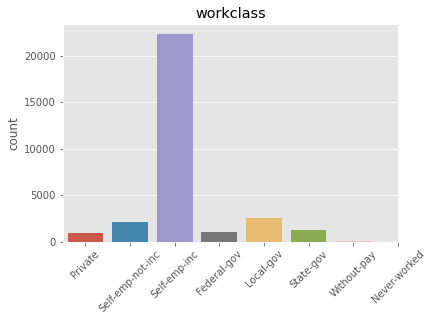

In [200]:
sns.countplot(data=data, x='workclass') # plot the union variable
plt.title('workclass')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7],labels=['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'],rotation=45)
plt.show() 

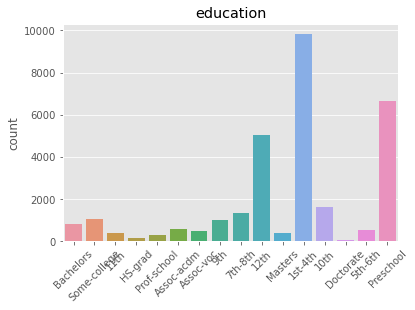

In [202]:
sns.countplot(data=data, x='education') # plot the union variable
plt.title('education')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],labels=['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm',
                                           'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 
                                           'Preschool'],rotation=45)
plt.show() 

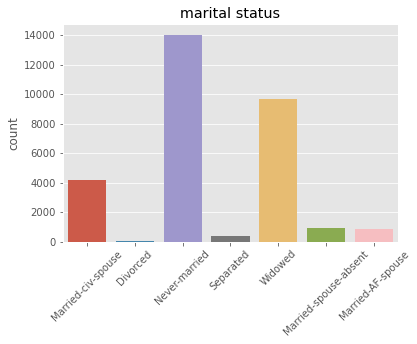

In [204]:
sns.countplot(data=data, x='marital') # plot the union variable
plt.title('marital status')
plt.xlabel('') 
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 
                                           'Married-spouse-absent', 'Married-AF-spouse'],rotation=45)
plt.show() 

In [191]:
#to make it comparable, standardize
numeric_cols = ['age', 'fnlwgt', 'edu_num', 'capital_gain', 'capital_loss', 'hours_per_week']
scaler = StandardScaler()
for col in numeric_cols:
    data[col] = scaler.fit_transform(data[[col]].values)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30139 non-null  float64
 1   workclass       30139 non-null  int64  
 2   fnlwgt          30139 non-null  float64
 3   education       30139 non-null  int64  
 4   edu_num         30139 non-null  float64
 5   marital         30139 non-null  int64  
 6   occupation      30139 non-null  int64  
 7   relationship    30139 non-null  int64  
 8   race            30139 non-null  int64  
 9   sex             30139 non-null  int64  
 10  capital_gain    30139 non-null  float64
 11  capital_loss    30139 non-null  float64
 12  hours_per_week  30139 non-null  float64
 13  country         30139 non-null  int64  
 14  income          30139 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 3.7 MB


In [192]:
summary=data.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
age,"30,139.0000",-0.0000,1.0000,-1.6300,-0.8000,-0.1100,0.6500,3.9300
workclass,"30,139.0000",2.2000,0.9500,0.0000,2.0000,2.0000,2.0000,6.0000
fnlwgt,"30,139.0000",0.0000,1.0000,-1.6700,-0.6800,-0.1100,0.4500,12.2600
education,"30,139.0000",10.3300,3.8100,0.0000,9.0000,11.0000,12.0000,15.0000
edu_num,"30,139.0000",0.0000,1.0000,-3.5800,-0.4400,-0.0500,1.1300,2.3100
marital,"30,139.0000",2.5800,1.5000,0.0000,2.0000,2.0000,4.0000,6.0000
occupation,"30,139.0000",5.9600,4.0300,0.0000,2.0000,6.0000,9.0000,13.0000
relationship,"30,139.0000",1.4200,1.6000,0.0000,0.0000,1.0000,3.0000,5.0000
race,"30,139.0000",3.6800,0.8300,0.0000,4.0000,4.0000,4.0000,4.0000
sex,"30,139.0000",0.6800,0.4700,0.0000,0.0000,1.0000,1.0000,1.0000


The summary statistics table provides us with a good overview of some of the variables we're interested in. However, you'll notice that it omits many of the other variables in our dataset: the categorical ones. This is because calculating the mean, standard deviation, etc. of something like the "occupation" column doesn't really make sense. For that, we turn to visualization.

# Methodology

In [158]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(data_t.drop(['traffic_volume'], axis = 1), data_t.traffic_volume, random_state=random_state_split)

In [159]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(36153, 24)
(36153,)
(12051, 24)
(12051,)
True
True


In [160]:
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(train_x, train_y)
# print the tree depth
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 59


In [161]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,50,69,90], 'min_samples_split':[1000,1200,1400,1600,1800]}

randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(dt, hyperparameters)

clf.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 1400}
The best score is: 
0.07266196171866161


In [162]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=10, min_samples_split=1400, random_state=10000)

In [163]:
print("R2 on the training data:")
print(dt_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(dt_final.score(X=test_x, y=test_y))

R2 on the training data:
0.08173333419154094
R2 on the testing data:
0.07573435920268834


Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5S595.